In [3]:
import sys
sys.path.append('.\\sources')

In [4]:
import pandas as pd
import hierar as HR
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dfr = pd.read_csv('../feature_engineering/seoulDate_dateEngin.csv')
dfr.head()

,Unnamed: 0,Unnamed: 0.1,datetime,date,hour,season,holiday,open,rent_count,temperature,...,solar_radiation,rainfall,snowfall,month,week,day_of_month,day_of_year,day_of_week,dayName_of_week,month_name
0,0,1,2017-12-01 00:00:00,2017-12-01,0,Winter,No Holiday,Yes,254,-5.2,...,0.0,0.0,0,12,48,1,335,4,Friday,Dec
1,1,2,2017-12-01 01:00:00,2017-12-01,1,Winter,No Holiday,Yes,204,-5.5,...,0.0,0.0,0,12,48,1,335,4,Friday,Dec
2,2,3,2017-12-01 02:00:00,2017-12-01,2,Winter,No Holiday,Yes,173,-6.0,...,0.0,0.0,0,12,48,1,335,4,Friday,Dec
3,3,4,2017-12-01 03:00:00,2017-12-01,3,Winter,No Holiday,Yes,107,-6.2,...,0.0,0.0,0,12,48,1,335,4,Friday,Dec
4,4,5,2017-12-01 04:00:00,2017-12-01,4,Winter,No Holiday,Yes,78,-6.0,...,0.0,0.0,0,12,48,1,335,4,Friday,Dec


In [10]:
dfr.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'datetime', 'date', 'hour', 'season',
       'holiday', 'open', 'rent_count', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dewpoint_temp', 'solar_radiation',
       'rainfall', 'snowfall', 'month', 'week', 'day_of_month', 'day_of_year',
       'day_of_week', 'dayName_of_week', 'month_name'],
      dtype='object')

In [12]:
df = dfr.drop(['Unnamed: 0', 'Unnamed: 0.1', 'datetime', 'open', 'dayName_of_week', 'month_name'], axis = 1, inplace = False)
df.head()

,date,hour,season,holiday,rent_count,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall,month,week,day_of_month,day_of_year,day_of_week
0,2017-12-01,0,Winter,No Holiday,254,-5.2,37,2.2,20000,-17.6,0.0,0.0,0,12,48,1,335,4
1,2017-12-01,1,Winter,No Holiday,204,-5.5,38,0.8,20000,-17.6,0.0,0.0,0,12,48,1,335,4
2,2017-12-01,2,Winter,No Holiday,173,-6.0,39,1.0,20000,-17.7,0.0,0.0,0,12,48,1,335,4
3,2017-12-01,3,Winter,No Holiday,107,-6.2,40,0.9,20000,-17.6,0.0,0.0,0,12,48,1,335,4
4,2017-12-01,4,Winter,No Holiday,78,-6.0,36,2.3,20000,-18.6,0.0,0.0,0,12,48,1,335,4


In [46]:
corr = df.corr()
cols2 = corr['rent_count']
cols2.index
cols = [x for _, x in sorted(zip(cols2.tolist(), cols2.index))]

dfn = df[cols]
corr2 = dfn.corr()

<AxesSubplot:>

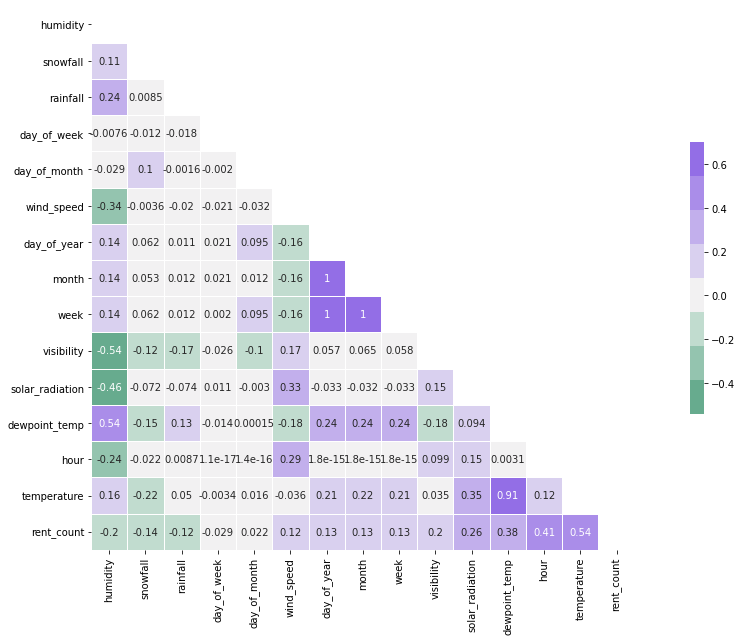

In [47]:
plt.subplots(figsize=(20, 10))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
mask = np.triu(np.ones_like(corr2, dtype=bool))
sns.heatmap(corr2, mask=mask,cmap=cmap,vmax =0.7, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

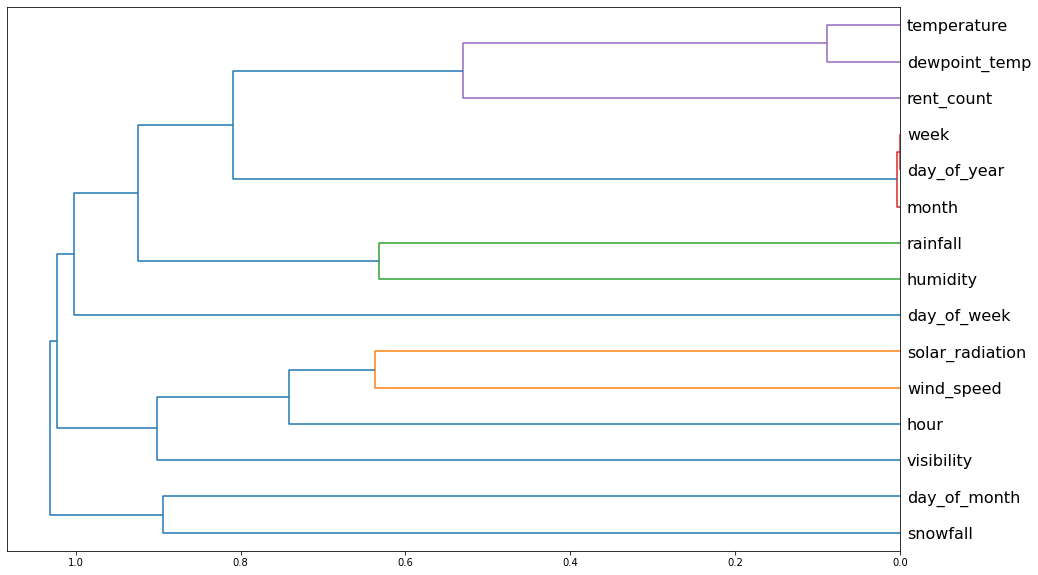

In [48]:
HR.plot_dendro_col(dfn)

# bike_clean.csv

In [2]:
df = pd.read_csv('../data/bike_clean.csv')
df.head()

,Unnamed: 0,datetime,date,hour,season,holiday,open,rent_count,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall
0,1,2017-12-01 00:00:00,2017-12-01,0,Winter,No Holiday,Yes,254,-5.2,37,2.2,20000,-17.6,0.0,0.0,0
1,2,2017-12-01 01:00:00,2017-12-01,1,Winter,No Holiday,Yes,204,-5.5,38,0.8,20000,-17.6,0.0,0.0,0
2,3,2017-12-01 02:00:00,2017-12-01,2,Winter,No Holiday,Yes,173,-6.0,39,1.0,20000,-17.7,0.0,0.0,0
3,4,2017-12-01 03:00:00,2017-12-01,3,Winter,No Holiday,Yes,107,-6.2,40,0.9,20000,-17.6,0.0,0.0,0
4,5,2017-12-01 04:00:00,2017-12-01,4,Winter,No Holiday,Yes,78,-6.0,36,2.3,20000,-18.6,0.0,0.0,0


In [3]:
df.drop(['Unnamed: 0', 'datetime'], axis = 1, inplace = True)

<AxesSubplot:>

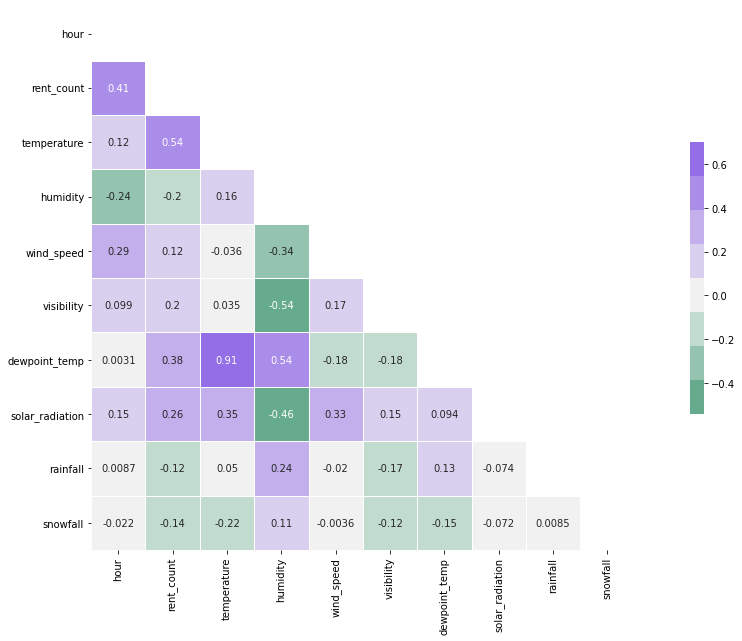

In [8]:
corr = df.corr()
plt.subplots(figsize=(20, 10))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask,cmap=cmap,vmax =0.7, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

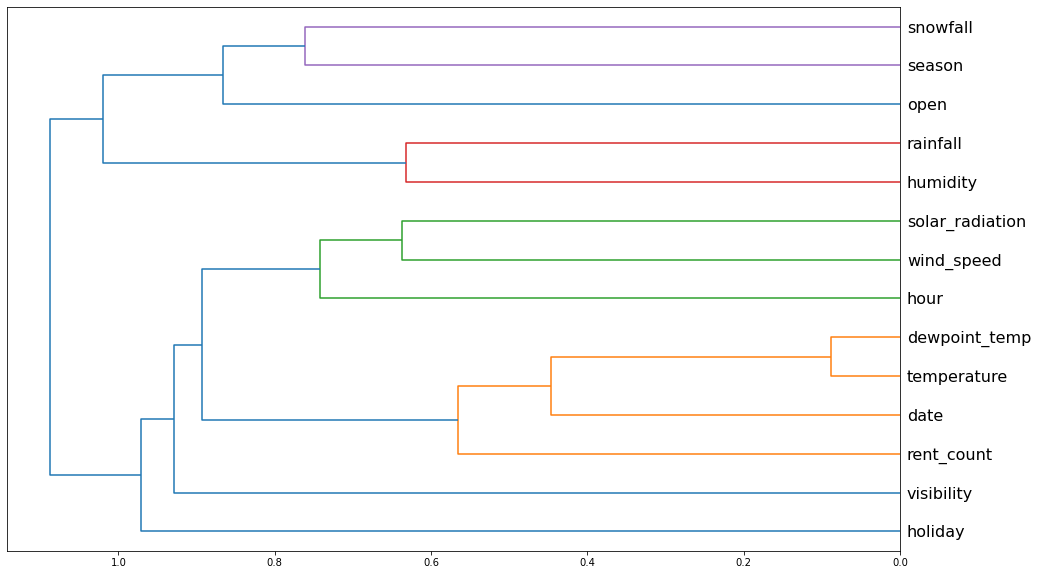

In [6]:
HR.plot_dendro_col(df)